In [2]:
import pandas as pd

df = pd.read_csv('casino_datos_limpios.csv')
df


,ID(Juego),Jugadores,Skins,Dinero,Ticks,PersonasGanaron,PersonasPerdieron,PagoTotal,FechaYHora,ModeradorActivo
0,Demo,144.00,174.0,283.57000,14.30,125.459984,0.25000,408.780000,2021-08-25 16:43,False
1,2091104.0,134.00,182.0,279.30000,1.14,5.810003,177.04000,108.070010,2021-08-25 16:44,False
2,2091105.0,139.00,179.0,282.87000,3.91,125.010000,5.96000,401.919920,2021-08-25 16:44,False
3,2091106.0,139.00,169.0,271.44000,11.38,6.900001,181.85000,96.490005,2021-08-25 16:45,False
4,2091107.0,142.00,177.0,304.88000,1.00,0.000000,304.88000,0.000000,2021-08-25 16:45,False
...,...,...,...,...,...,...,...,...,...,...
60581,2122992.0,102.00,126.0,254.94005,1.43,66.560000,46.01001,282.419920,2021-09-06 06:03,False
60582,2103773.0,111.00,141.0,232.30998,6.08,109.880010,0.25000,454.479950,2021-08-30 07:20,False
60583,2095973.0,125.00,156.0,285.18005,1.00,0.000000,285.18005,0.000000,2021-08-27 10:46,False
60584,2132428.0,116.00,158.0,299.85000,1.11,6.260001,79.17000,178.950040,2021-09-09 16:42,False


## 1. DESCRIPCION GENERAL

In [3]:
### VISION GENERAL DEL DATAFRAME ###

df.info()
print("\nNumero de filas:", df.shape[0])
print("Numero de variables:", df.shape[1])  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60586 entries, 0 to 60585
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID(Juego)          60586 non-null  object 
 1   Jugadores          60586 non-null  float64
 2   Skins              60586 non-null  float64
 3   Dinero             60586 non-null  float64
 4   Ticks              60586 non-null  float64
 5   PersonasGanaron    60586 non-null  float64
 6   PersonasPerdieron  60586 non-null  float64
 7   PagoTotal          60586 non-null  float64
 8   FechaYHora         60586 non-null  object 
 9   ModeradorActivo    60586 non-null  bool   
dtypes: bool(1), float64(7), object(2)
memory usage: 4.2+ MB

Numero de filas: 60586
Numero de variables: 10


In [4]:
### Tipos de variables ###

# Tipo de variable por columna a dataframe
tipos_df = pd.DataFrame(df.dtypes, columns=['Tipo de Dato'])
print("\nTipos de variables por columna:")
tipos_df
    


Tipos de variables por columna:


,Tipo de Dato
ID(Juego),object
Jugadores,float64
Skins,float64
Dinero,float64
Ticks,float64
PersonasGanaron,float64
PersonasPerdieron,float64
PagoTotal,float64
FechaYHora,object
ModeradorActivo,bool


In [5]:
### RESUMEN ESTADISTICO ###

#Variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df.describe()) 



Estadísticas descriptivas de las variables numéricas:
          Jugadores         Skins        Dinero         Ticks  \
count  60586.000000  60586.000000  60586.000000  60586.000000   
mean     123.070384    158.324791    285.141195     11.635565   
std       25.771853     30.481722    193.098637    229.224536   
min        0.000000      0.000000      0.000000      1.000000   
25%      103.000000    136.000000    216.722435      1.310000   
50%      122.000000    157.000000    257.885010      2.020000   
75%      137.000000    174.000000    306.139995      4.310000   
max      491.000000    552.000000   5696.327000  23522.650000   

       PersonasGanaron  PersonasPerdieron     PagoTotal  
count     60586.000000       60586.000000  60586.000000  
mean         66.664749          79.268438    272.230570  
std         112.342279         182.255044    214.646768  
min           0.000000           0.000000      0.000000  
25%          21.829999           3.780000    166.402492  
50%        

In [6]:
#Variables categoricas
df["ID(Juego)"].value_counts()

#Ciclo for para cada una de las variables categoricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValor counts para la columna '{col}':")
    print(df[col].value_counts()) 



Valor counts para la columna 'ID(Juego)':
ID(Juego)
Demo         3198
2115704.0       4
2100714.0       3
2097167.0       3
2101420.0       3
             ... 
2119001.0       1
2106935.0       1
2097953.0       1
2103773.0       1
2131341.0       1
Name: count, Length: 53273, dtype: int64

Valor counts para la columna 'FechaYHora':
FechaYHora
1999-09-09 09:09    3217
2021-08-29 23:40       6
2021-09-01 15:11       6
2021-09-03 12:31       6
2021-09-04 20:00       6
                    ... 
2021-08-29 07:54       1
2021-09-02 18:04       1
2021-09-07 00:35       1
2021-08-27 21:51       1
2021-09-06 23:32       1
Name: count, Length: 27787, dtype: int64


In [7]:
# Variables booleanas
for col in df.select_dtypes(include=['bool']).columns:
    print(f"\nValor counts para la columna booleana '{col}':")
    print(df[col].value_counts())


Valor counts para la columna booleana 'ModeradorActivo':
ModeradorActivo
False    60443
True       143
Name: count, dtype: int64


## 2. VISUALIZACIÓN Y DISTRIBUCIÓN DE VARIABLES INDIVIDUALES

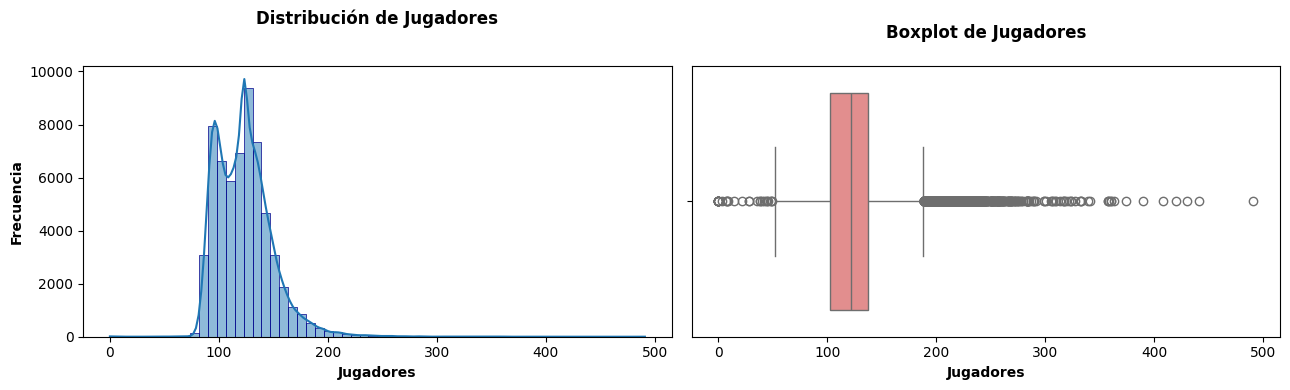

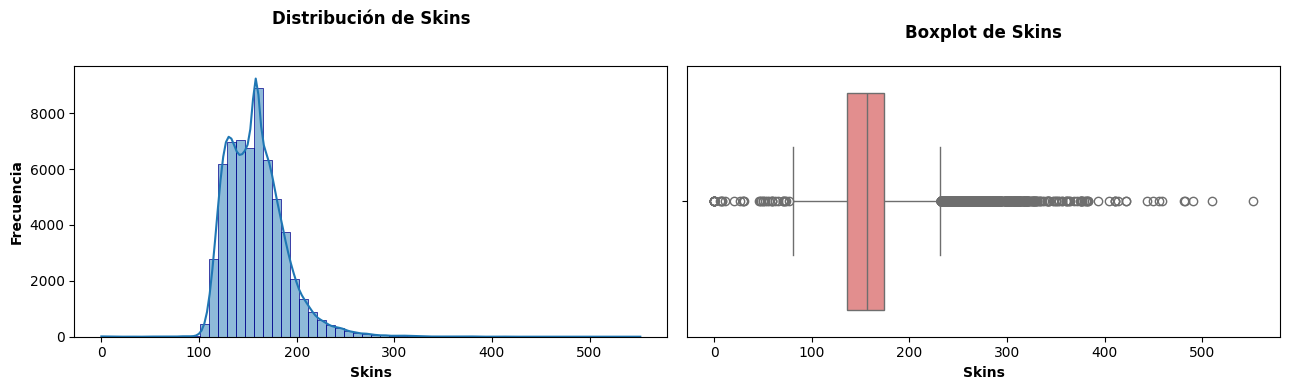

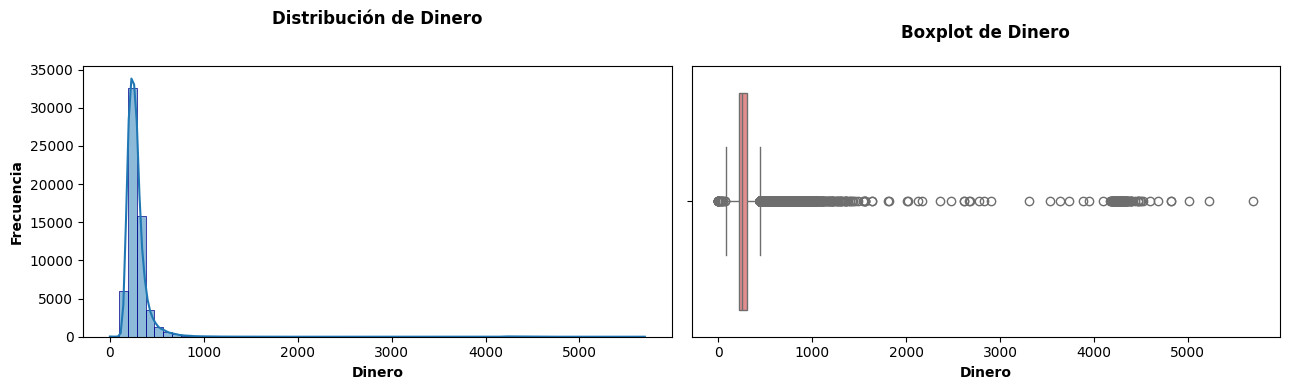

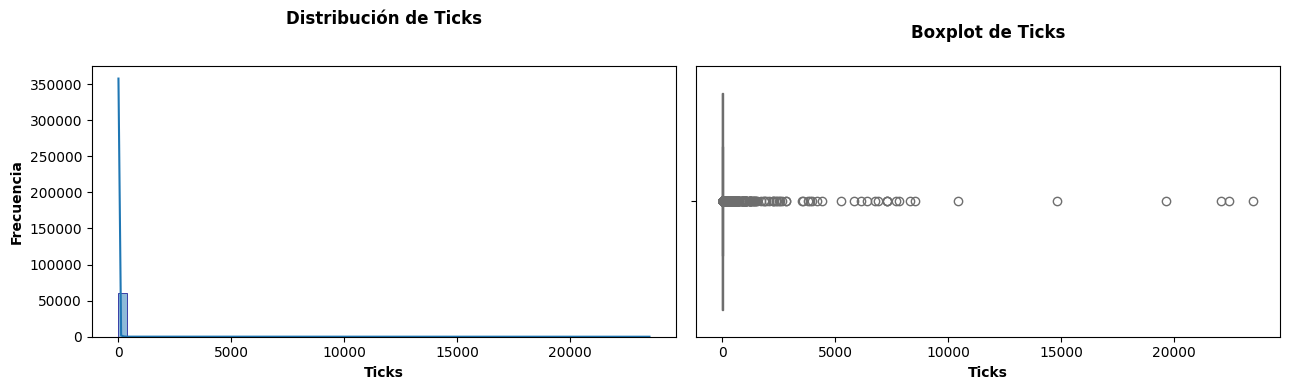

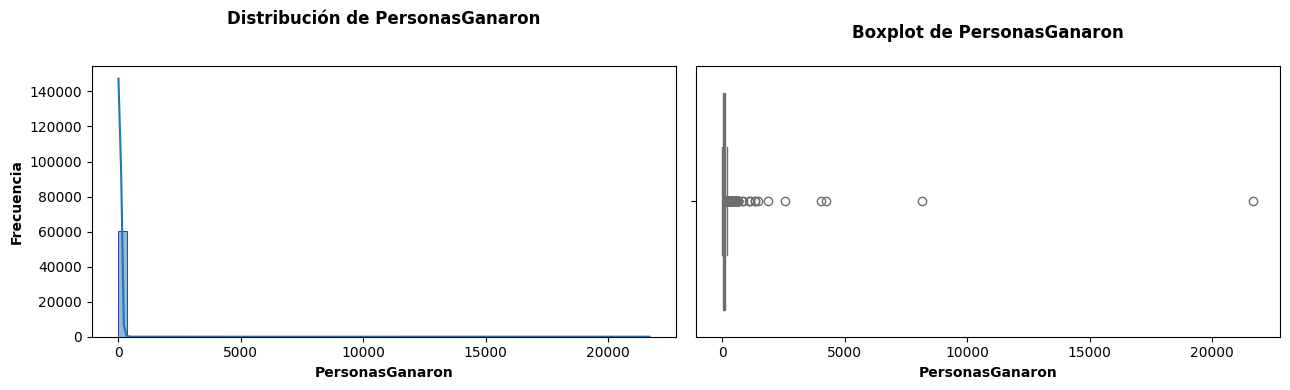

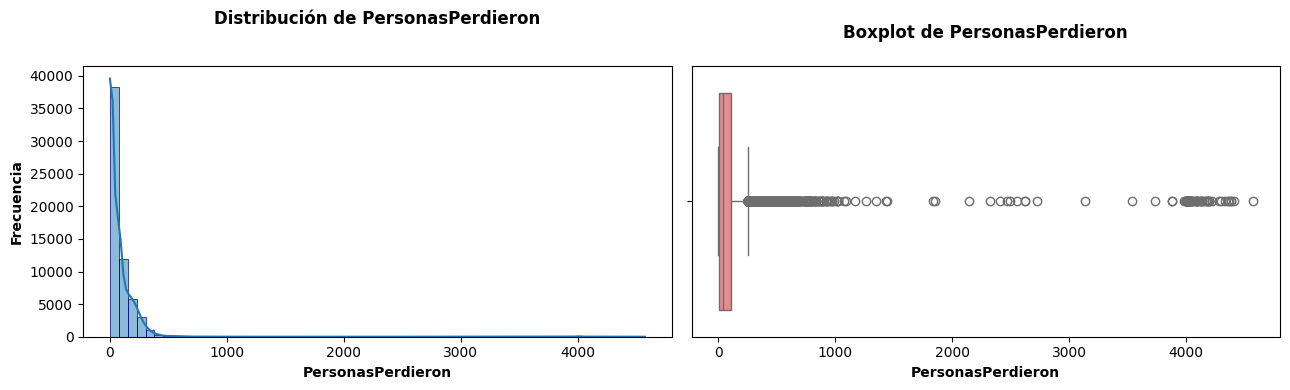

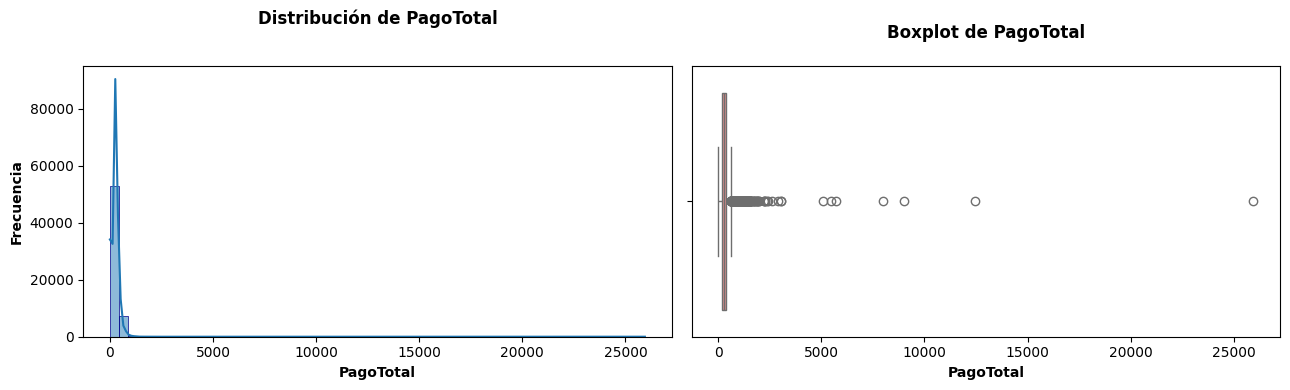

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma y boxplot para variables numéricas

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(13, 4)) 
    
    # HISTOGRAMA 
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=60,edgecolor='darkblue')
    plt.title(f'Distribución de {col}', fontweight='bold', pad=30)
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Frecuencia', fontweight='bold')
    
    
    # BOXPLOT 
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}', fontweight='bold', pad=20)
    plt.xlabel(col, fontweight='bold')

    
    plt.tight_layout()
    plt.show()
    
   

C:\Users\samue\AppData\Local\Temp\ipykernel_37580\2477056348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['ID(Juego)'].apply(lambda x: 'Demo' if x == 'Demo' else 'Otros'),palette='Set2')


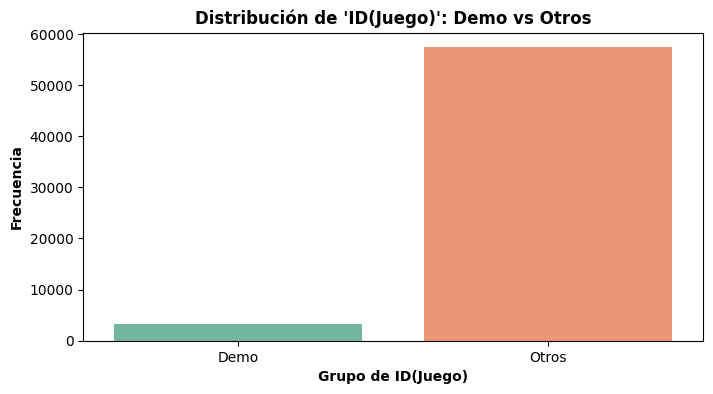

In [9]:
# Gráfico de barras para variable categórica 'ID(Juego)'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=df['ID(Juego)'].apply(lambda x: 'Demo' if x == 'Demo' else 'Otros'),palette='Set2')
plt.title("Distribución de 'ID(Juego)': Demo vs Otros", fontweight='bold')
plt.xlabel("Grupo de ID(Juego)", fontweight='bold')
plt.ylabel("Frecuencia", fontweight='bold', )
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_37580\1577340673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


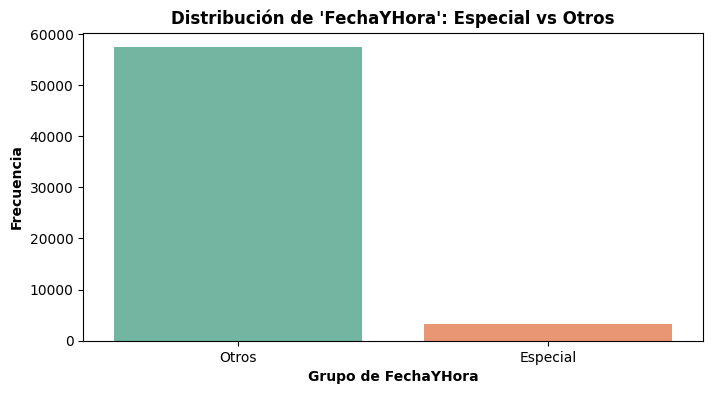

In [10]:
# Gráfico de barras para variable categórica 'FechaYHora'
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x=df['FechaYHora'].apply(lambda x: 'Especial' if x == '1999-09-09 09:09' else 'Otros'),
    palette='Set2'
)
plt.title("Distribución de 'FechaYHora': Especial vs Otros", fontweight='bold')
plt.xlabel("Grupo de FechaYHora", fontweight='bold')
plt.ylabel("Frecuencia", fontweight='bold')
plt.show()

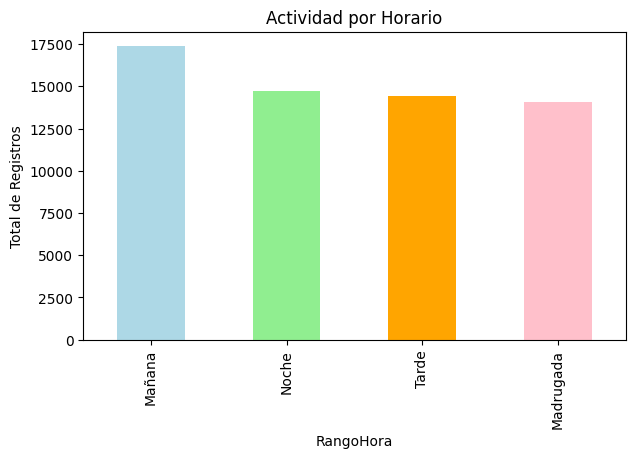

In [11]:
# Versión con ciclo for en lugar de lambda
rangos_hora = []
horas = pd.to_datetime(df['FechaYHora']).dt.hour

for hora in horas:
    if hora < 6:
        rangos_hora.append('Madrugada')
    elif hora < 12:
        rangos_hora.append('Mañana')
    elif hora < 18:
        rangos_hora.append('Tarde')
    else:
        rangos_hora.append('Noche')

df['RangoHora'] = rangos_hora

# El gráfico se mantiene igual
plt.figure(figsize=(7, 4))
df['RangoHora'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen', 'orange', 'pink'])
plt.title("Actividad por Horario")
plt.ylabel("Total de Registros")
plt.show()

## CORRELACIÓN ENTRE VARIABLES

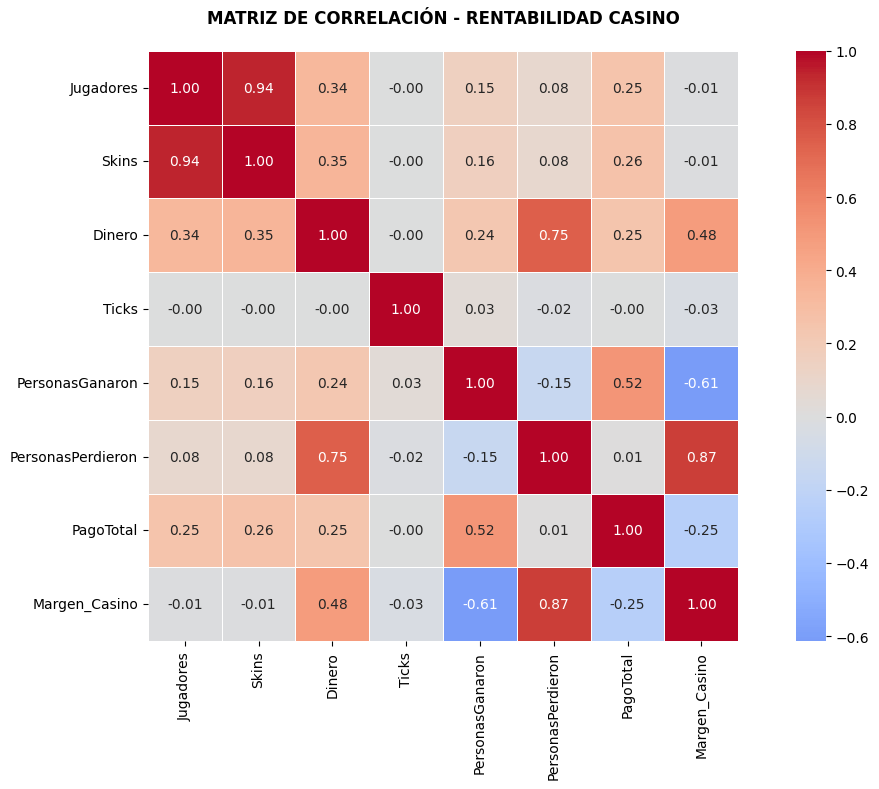

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular margen del casino
df['Margen_Casino'] = df['PersonasPerdieron'] - df['PersonasGanaron']

# Variables para correlación (incluyendo margen)
vars_corr = ['Jugadores', 'Skins', 'Dinero', 'Ticks', 
             'PersonasGanaron', 'PersonasPerdieron', 'PagoTotal', 'Margen_Casino']

# Matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = df[vars_corr].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=0.5)
plt.title('MATRIZ DE CORRELACIÓN - RENTABILIDAD CASINO', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


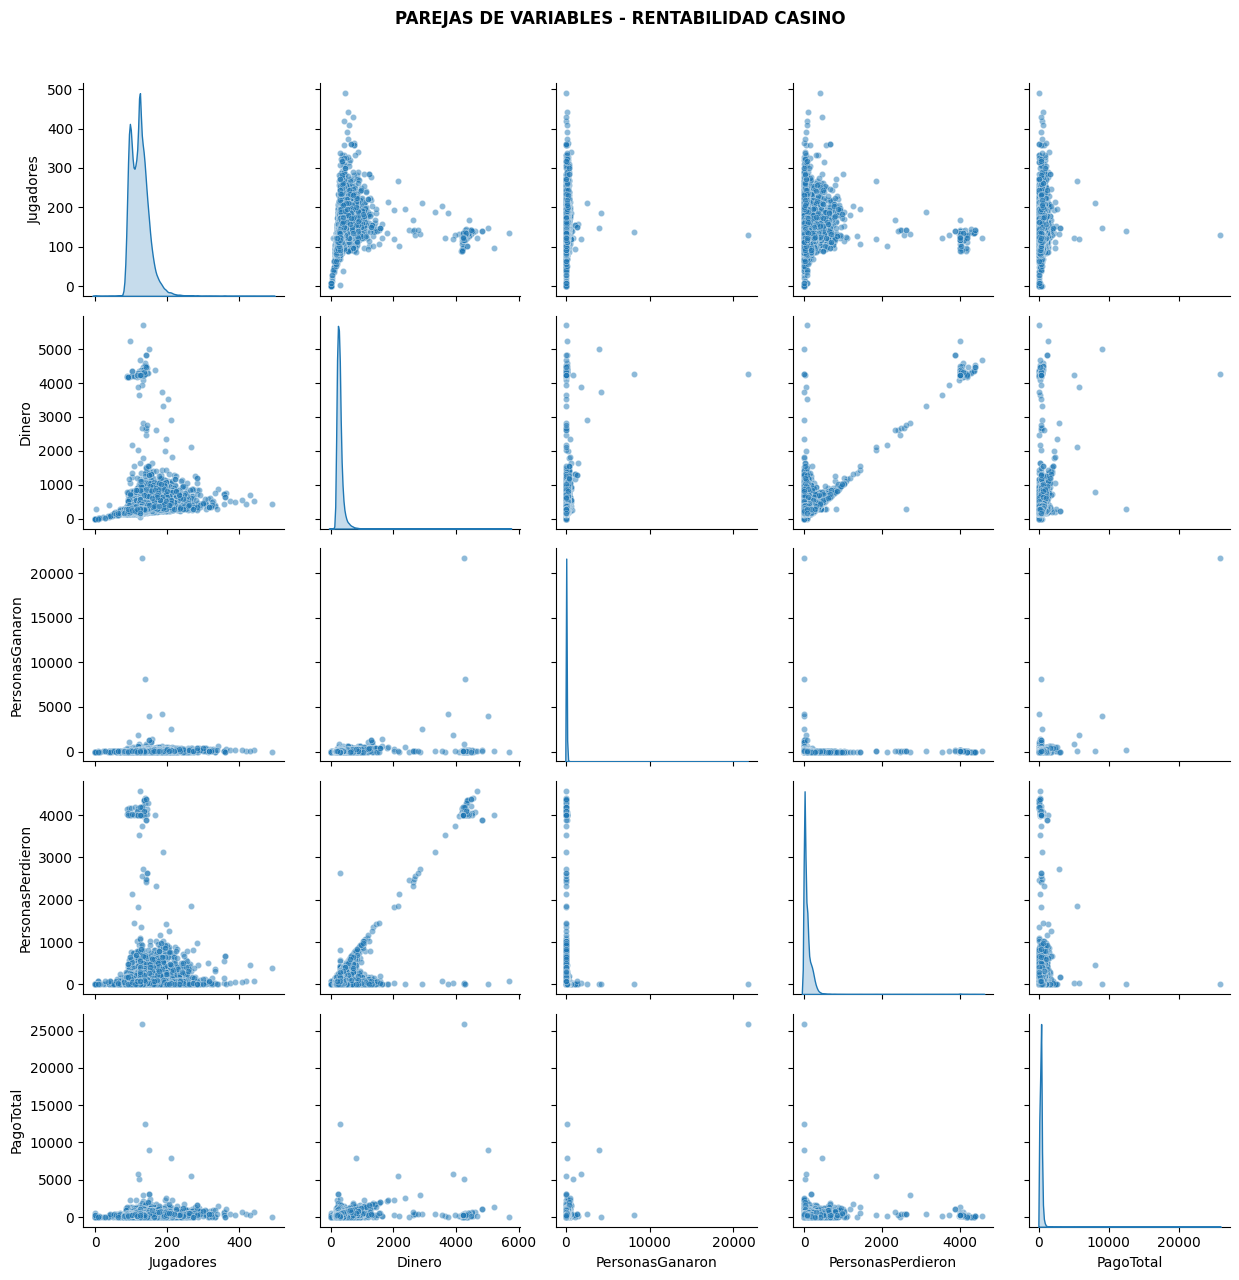

In [13]:
# Variables para el pairplot (usando las correlaciones fuertes)
vars_corr = ['Jugadores', 'Dinero', 'PersonasGanaron', 'PersonasPerdieron', 'PagoTotal']

# Crear el scatterplot
sns.pairplot(df[vars_corr], diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle('PAREJAS DE VARIABLES - RENTABILIDAD CASINO', fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

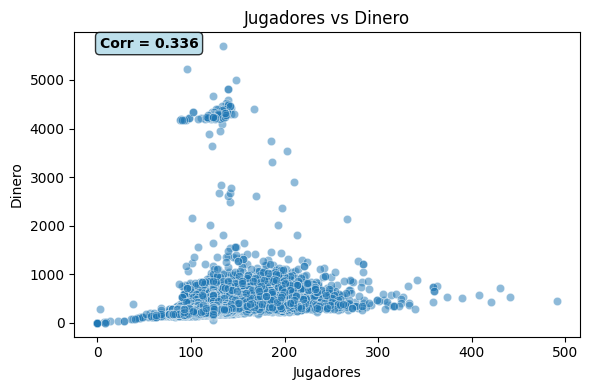

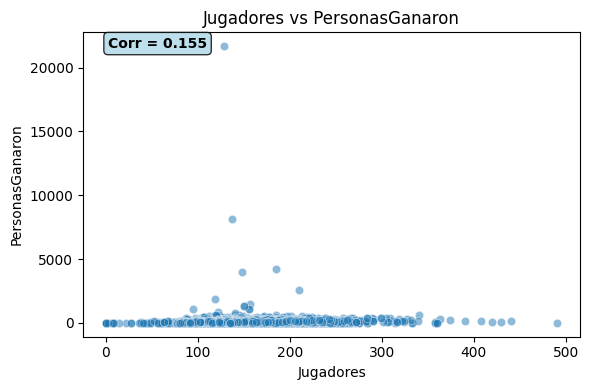

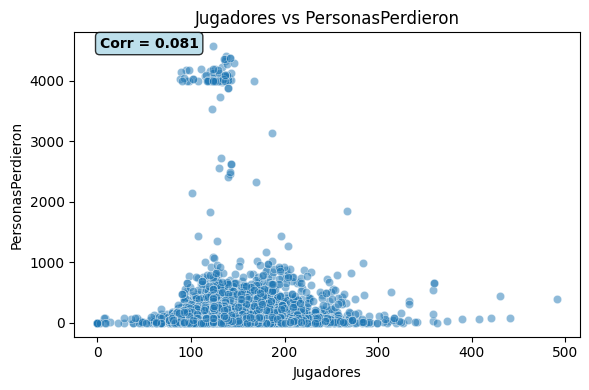

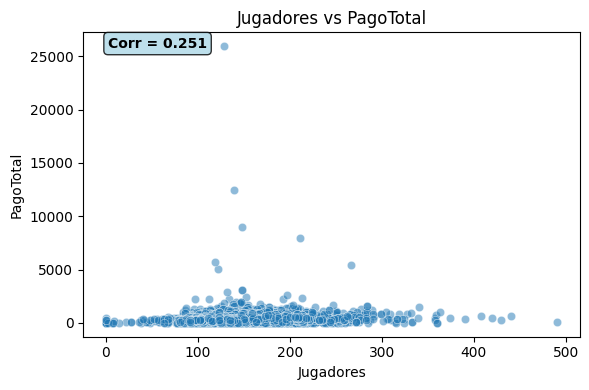

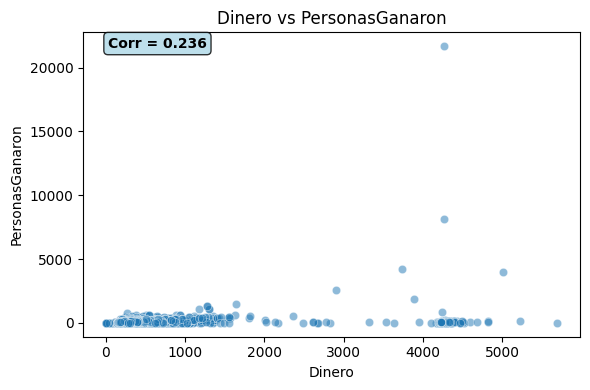

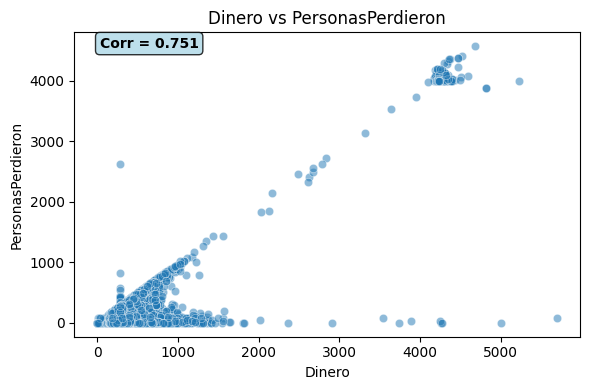

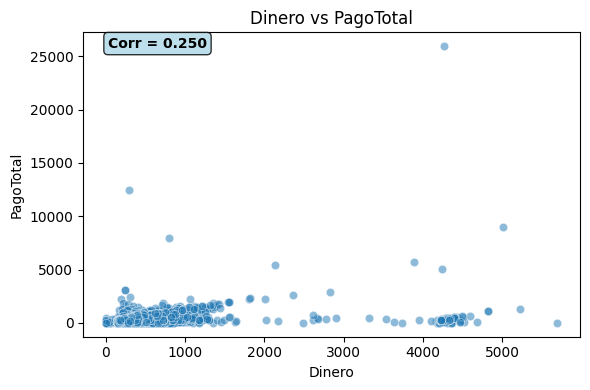

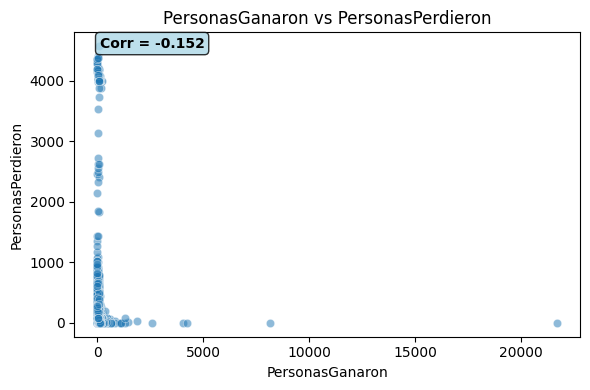

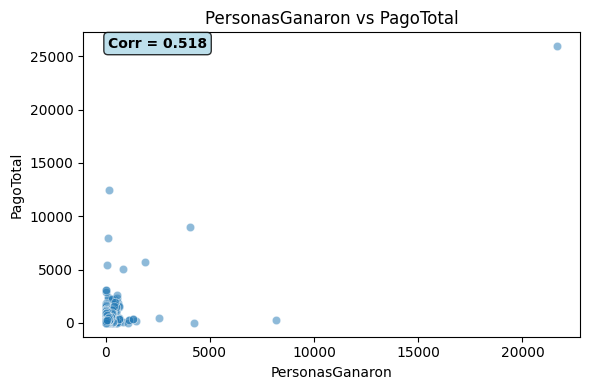

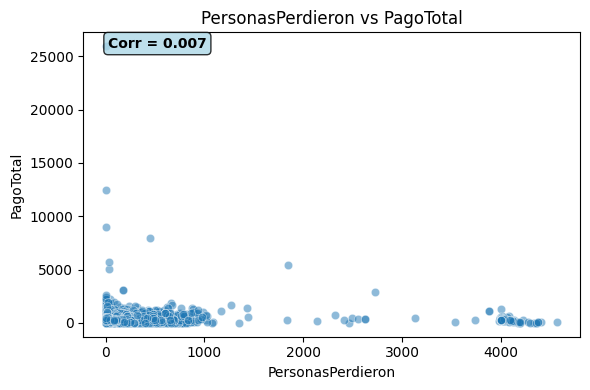

In [14]:
# Variables para los scatter plots
vars_corr = ['Jugadores', 'Dinero', 'PersonasGanaron', 'PersonasPerdieron', 'PagoTotal']

# Scatter plots simples
for i in range(len(vars_corr)):
    for j in range(i + 1, len(vars_corr)):
        plt.figure(figsize=(6, 4))
        
        # Scatter plot básico
        sns.scatterplot(data=df, x=vars_corr[i], y=vars_corr[j], alpha=0.5)
        
        # Calcular correlación
        correlacion = df[vars_corr[i]].corr(df[vars_corr[j]])
        
        plt.title(f'{vars_corr[i]} vs {vars_corr[j]}')
        plt.xlabel(vars_corr[i])
        plt.ylabel(vars_corr[j])

        # Agregar caja de correlación
        plt.text(0.05, 0.95, f'Corr = {correlacion:.3f}', 
                transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", 
                facecolor='lightblue', alpha=0.8), fontweight='bold')
        
        plt.tight_layout()
        plt.show()

## ANALISIS DE VALORES ATIPICOS

In [15]:
# Variables numéricas para análisis de outliers
variables_outliers = ['Jugadores', 'Skins', 'Dinero', 'Ticks', 
                     'PersonasGanaron', 'PersonasPerdieron', 'PagoTotal']

print("🔍 DETECCIÓN DE OUTLIERS POR IQR:")
print("=" * 50)

for col in variables_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    porcentaje_outliers = (len(outliers) / len(df)) * 100
    
    print(f"\n{col}:")
    print(f"   Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"   Límites: [{limite_inferior:.2f}, {limite_superior:.2f}]")
    print(f"   Outliers: {len(outliers):,} ({porcentaje_outliers:.1f}%)")
    print(f"   Máximo outlier: {df[col].max():.2f}")

🔍 DETECCIÓN DE OUTLIERS POR IQR:

Jugadores:
   Q1: 103.00, Q3: 137.00, IQR: 34.00
   Límites: [52.00, 188.00]
   Outliers: 1,126 (1.9%)
   Máximo outlier: 491.00

Skins:
   Q1: 136.00, Q3: 174.00, IQR: 38.00
   Límites: [79.00, 231.00]
   Outliers: 1,427 (2.4%)
   Máximo outlier: 552.00

Dinero:
   Q1: 216.72, Q3: 306.14, IQR: 89.42
   Límites: [82.60, 440.27]
   Outliers: 3,542 (5.8%)
   Máximo outlier: 5696.33

Ticks:
   Q1: 1.31, Q3: 4.31, IQR: 3.00
   Límites: [-3.19, 8.81]
   Outliers: 8,468 (14.0%)
   Máximo outlier: 23522.65

PersonasGanaron:
   Q1: 21.83, Q3: 95.56, IQR: 73.73
   Límites: [-88.76, 206.15]
   Outliers: 1,116 (1.8%)
   Máximo outlier: 21681.59

PersonasPerdieron:
   Q1: 3.78, Q3: 104.73, IQR: 100.95
   Límites: [-147.64, 256.15]
   Outliers: 3,202 (5.3%)
   Máximo outlier: 4573.60

PagoTotal:
   Q1: 166.40, Q3: 355.44, IQR: 189.04
   Límites: [-117.15, 638.99]
   Outliers: 1,613 (2.7%)
   Máximo outlier: 25943.20


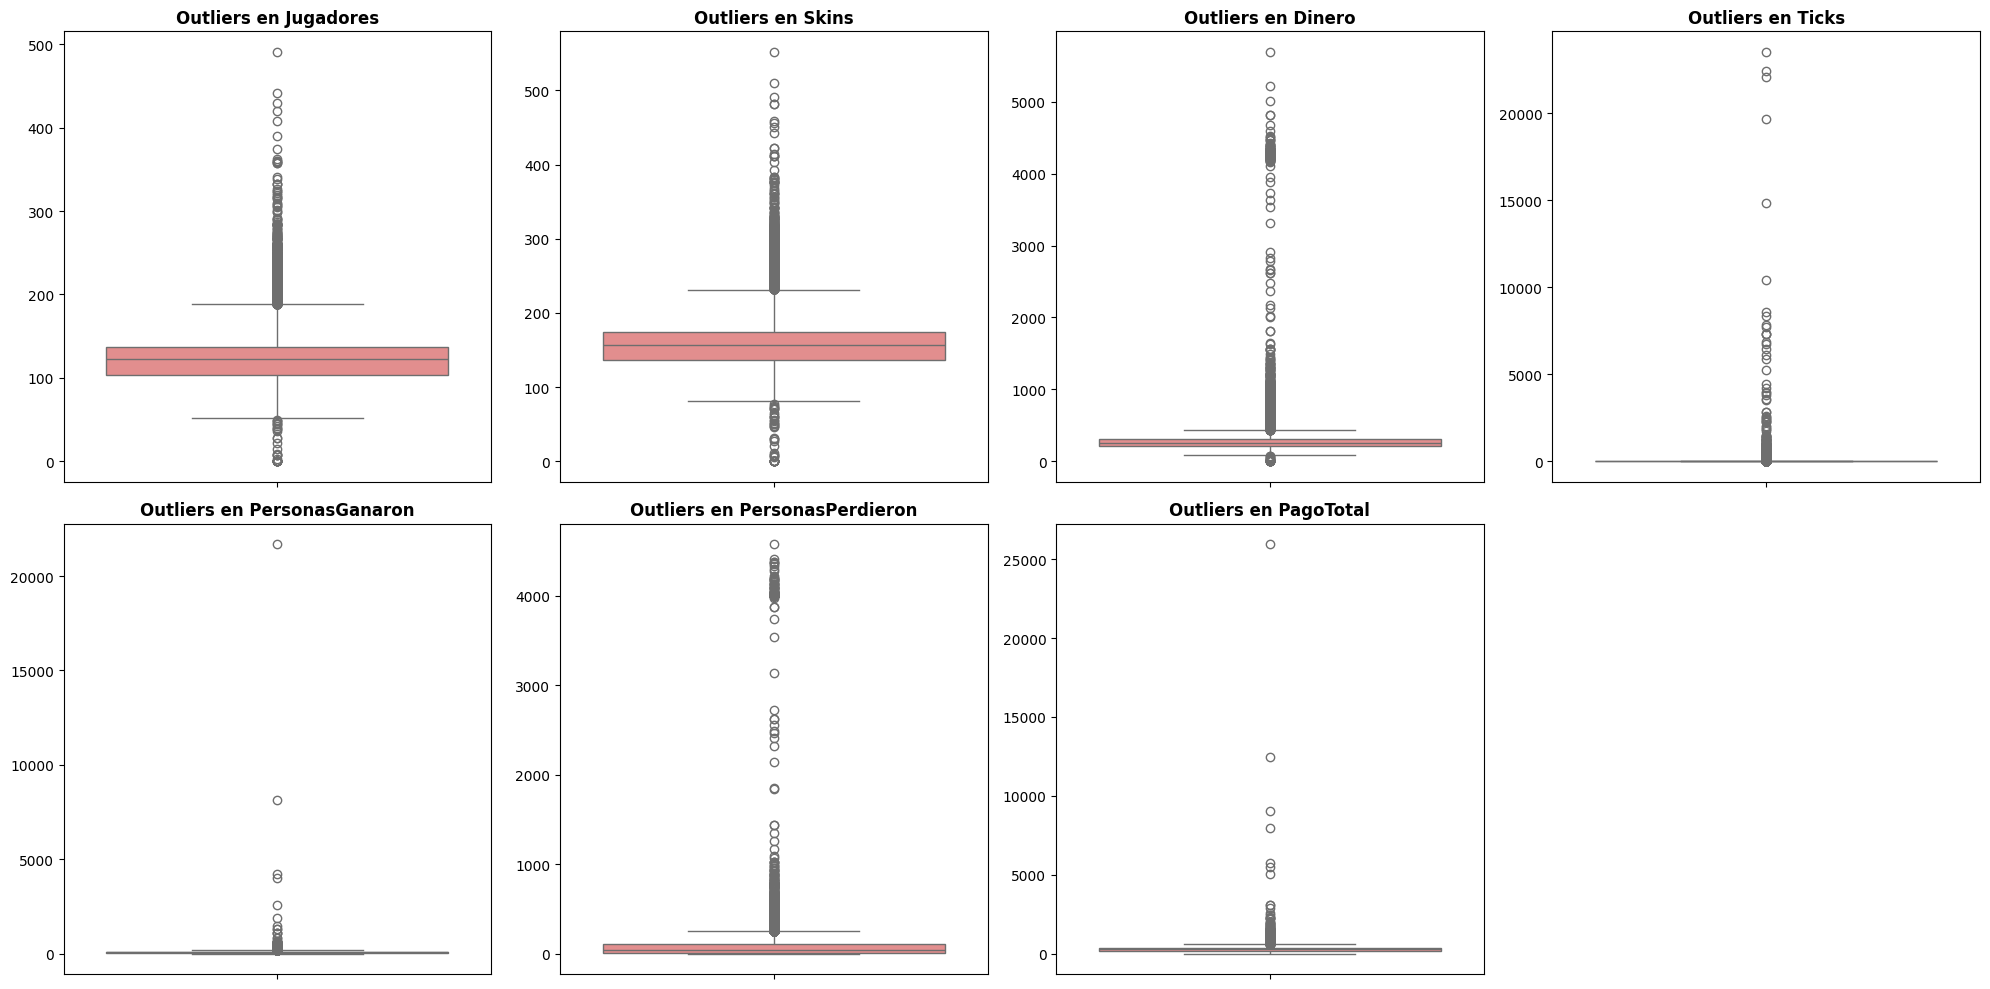

In [16]:
# Boxplots para identificar outliers visualmente
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(variables_outliers):
    sns.boxplot(data=df, y=col, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Outliers en {col}', fontweight='bold')
    axes[i].set_ylabel('')

# Ocultar el último subplot si no se usa
if len(variables_outliers) < 8:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [17]:
# Identificación: Mostrar porcentaje de datos faltantes
porcentaje_faltantes = (df.isna().sum() / len(df)) * 100
print(porcentaje_faltantes)

ID(Juego)            0.0
Jugadores            0.0
Skins                0.0
Dinero               0.0
Ticks                0.0
PersonasGanaron      0.0
PersonasPerdieron    0.0
PagoTotal            0.0
FechaYHora           0.0
ModeradorActivo      0.0
RangoHora            0.0
Margen_Casino        0.0
dtype: float64


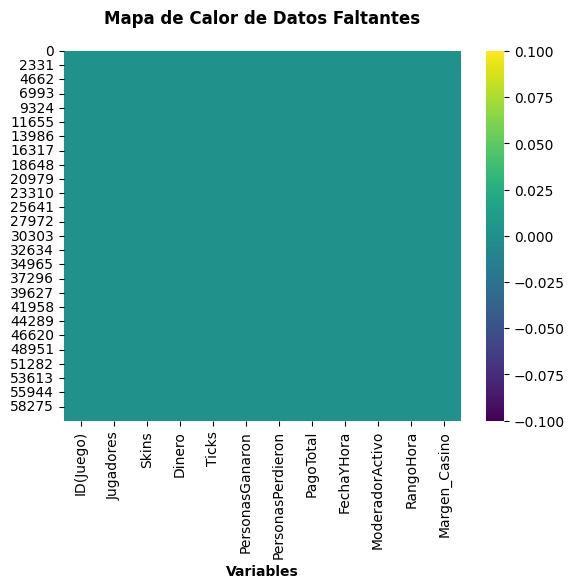

In [18]:
# Visualizar con mapa de calor, con descripción
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes', fontweight='bold', pad=20)
plt.xlabel('Variables', fontweight='bold')
plt.show()

## RELACIÓN ENTRE VARIABLES CATEGÓRICAS Y NÚMERICAS

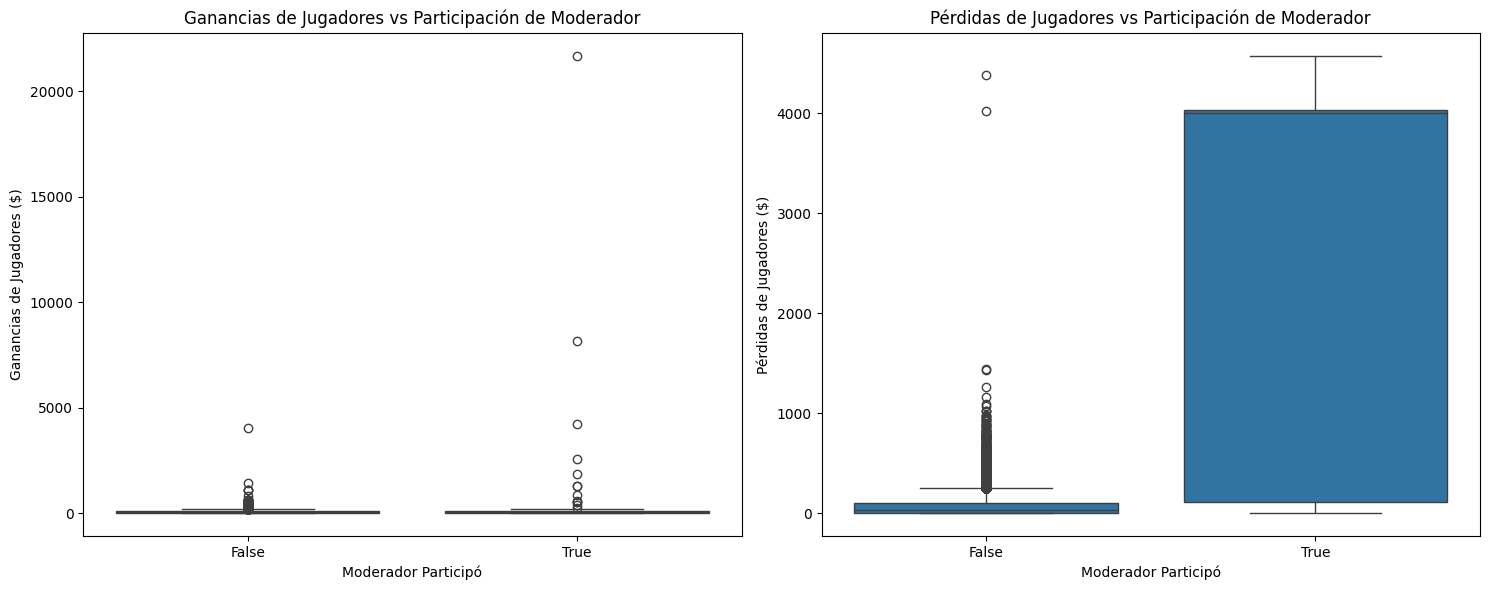

In [19]:
# VERIFICAR INFLUENCIA DE MODERADOR EN GANANCIAS/PERDIDAS DE JUGADORES

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Boxplot: moderator vs peopleWin
sns.boxplot(data=df, x='ModeradorActivo', y='PersonasGanaron', ax=axes[0])
axes[0].set_title('Ganancias de Jugadores vs Participación de Moderador')
axes[0].set_xlabel('Moderador Participó')
axes[0].set_ylabel('Ganancias de Jugadores ($)')
# Boxplot: moderator vs peopleLost
sns.boxplot(data=df, x='ModeradorActivo', y='PersonasPerdieron', ax=axes[1])
axes[1].set_title('Pérdidas de Jugadores vs Participación de Moderador')
axes[1].set_xlabel('Moderador Participó')
axes[1].set_ylabel('Pérdidas de Jugadores ($)')
plt.tight_layout()
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_37580\1304455147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='ID(Juego)', y=var, palette='Set3')


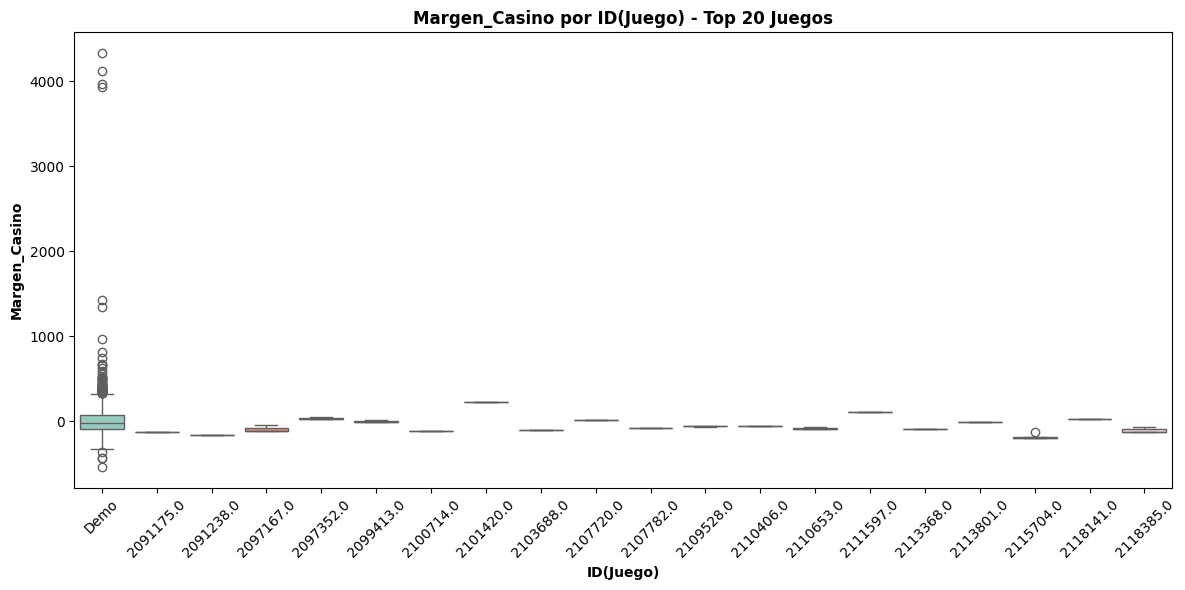

C:\Users\samue\AppData\Local\Temp\ipykernel_37580\1304455147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='ID(Juego)', y=var, palette='Set3')


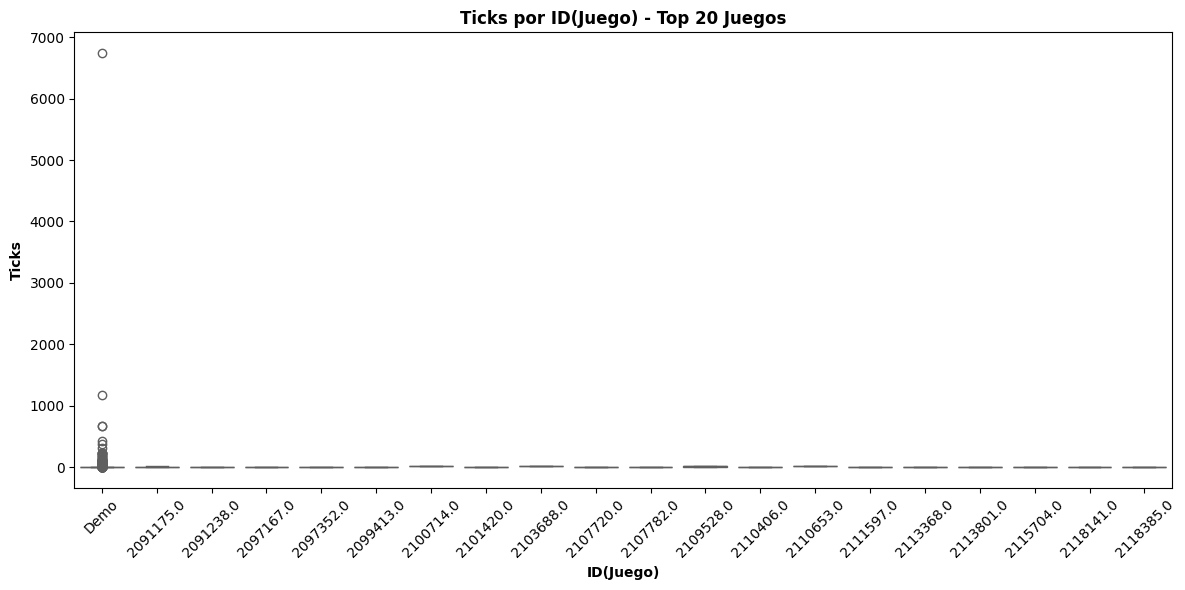

C:\Users\samue\AppData\Local\Temp\ipykernel_37580\1304455147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='ID(Juego)', y=var, palette='Set3')


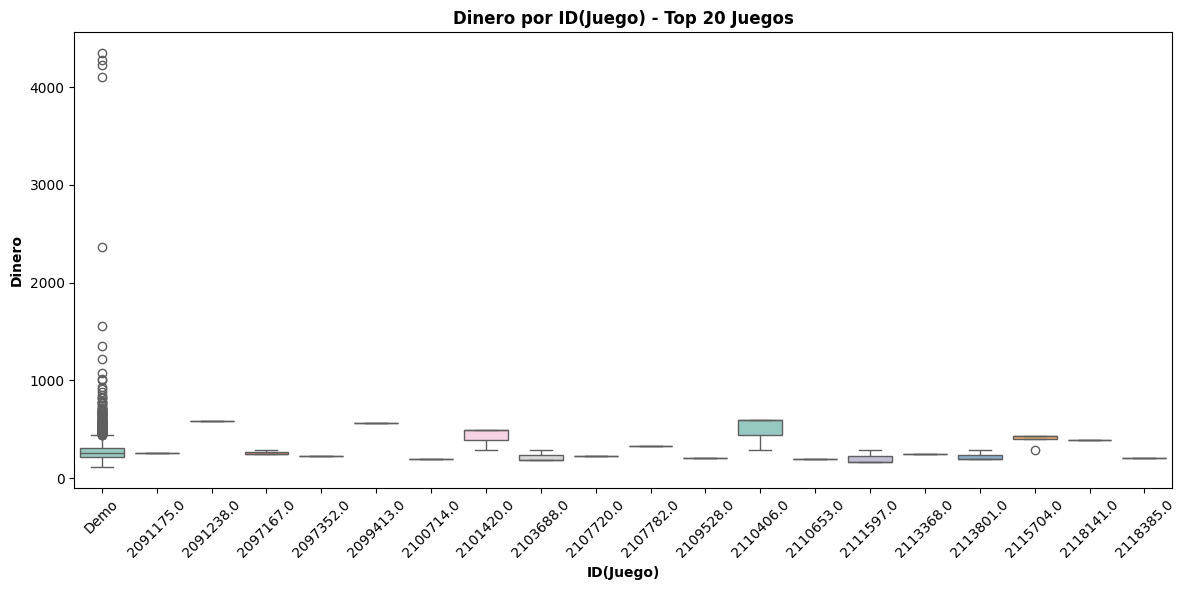

C:\Users\samue\AppData\Local\Temp\ipykernel_37580\1304455147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='ID(Juego)', y=var, palette='Set3')


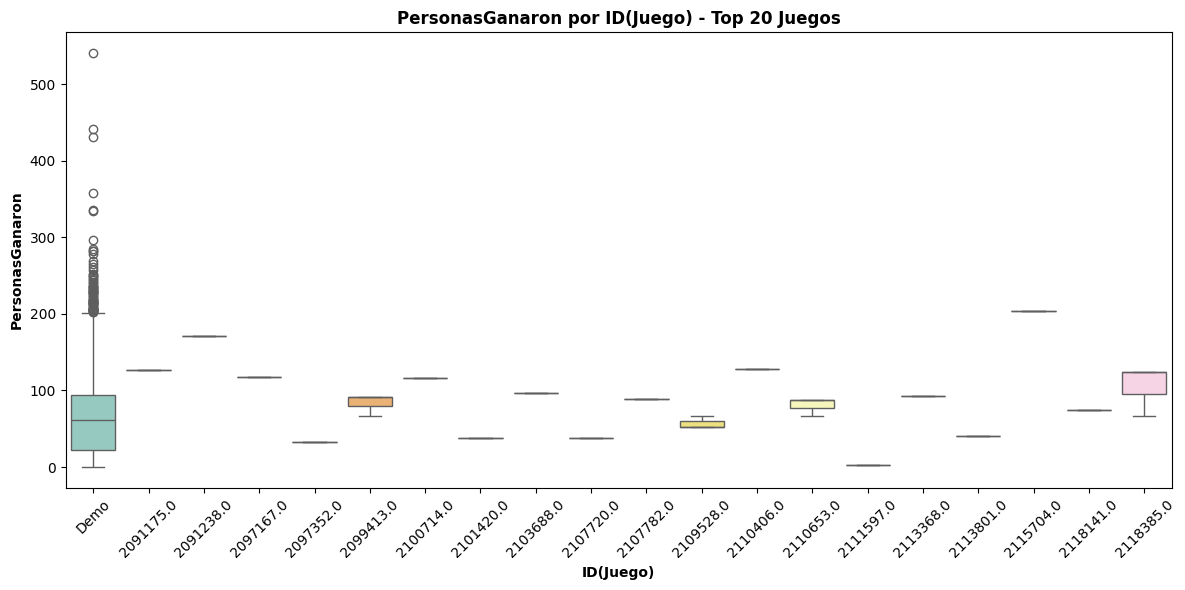

C:\Users\samue\AppData\Local\Temp\ipykernel_37580\1304455147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='ID(Juego)', y=var, palette='Set3')


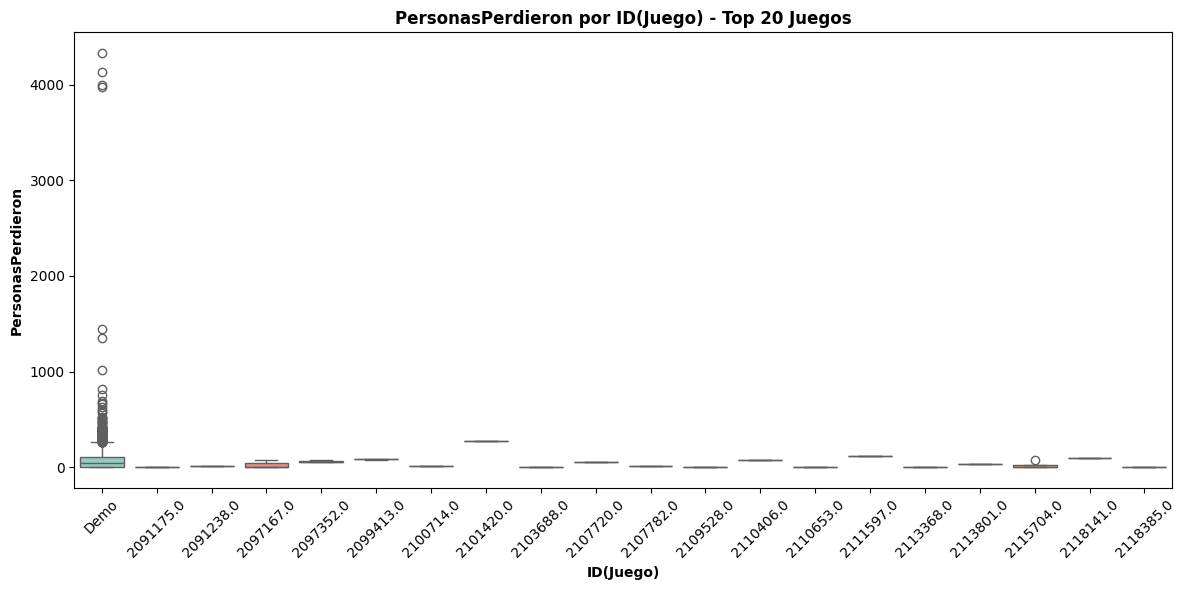

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Opción 1: Analizar solo los TOP 20 juegos más frecuentes
top_juegos = df['ID(Juego)'].value_counts().head(20).index
df_top = df[df['ID(Juego)'].isin(top_juegos)]

vars_analisis = ['Margen_Casino', 'Ticks', 'Dinero', 'PersonasGanaron', 'PersonasPerdieron']

for var in vars_analisis:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_top, x='ID(Juego)', y=var, palette='Set3')
    plt.title(f'{var} por ID(Juego) - Top 20 Juegos', fontweight='bold')
    plt.xlabel('ID(Juego)', fontweight='bold')
    plt.ylabel(var, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

ID(Juego) vs Ticks, revela que las pruebas demo tienden a ser más altas mientras que las demas experiencias reales varian en el 0 por lo que si se quiere analizar deberia ser por separado, pero al ser todas muy parecidas se puede trabajar con el promedio sin contar las demo por lo que se puede prescindir de esta grafica

## MACHINEA LEARNING 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [ ]:

# 1. PREPROCESAMIENTO DE DATOS
print("=== INICIANDO PREPROCESAMIENTO ===")

# Cargar dataset limpio (excluyendo 'Demo')
df_ml = df[df['ID(Juego)'] != 'Demo'].copy()

print(f"Registros después de excluir Demo: {len(df_ml)}")

# Verificar que tenemos la variable objetivo
if 'Margen_Casino' not in df_ml.columns:
    # Calcular margen del casino si no existe
    df_ml['Margen_Casino'] = ((df_ml['PersonasPerdieron'] - df_ml['PersonasGanaron']) / df_ml['Dinero']) * 100
    print("Variable Margen_Casino calculada automáticamente")

# Si son demasiados datos, tomar muestra para mayor velocidad
if len(df_ml) > 8000:
    df_ml = df_ml.sample(n=8000, random_state=42, replace=False)
    print(f"Muestra reducida a: {len(df_ml)} registros para mayor velocidad")

# Separar variables predictoras y objetivo
X = df_ml[['Ticks', 'Dinero', 'PersonasGanaron', 'PersonasPerdieron', 'ModeradorActivo', 'ID(Juego)', 'Skins']]
y = df_ml['Margen_Casino']

# Verificar que no hay valores nulos críticos
print("\nVerificación de valores nulos:")
print(X.isnull().sum())
print(f"Valores nulos en y: {y.isnull().sum()}")

# Limpiar cualquier valor nulo restante
X = X.fillna(X.median(numeric_only=True))
y = y.fillna(y.median())

# 2. CONFIGURACIÓN DEL PREPROCESADOR
print("\n=== CONFIGURANDO PREPROCESADOR ===")

# Definir tipos de variables
numeric_features = ['Ticks', 'Dinero', 'PersonasGanaron', 'PersonasPerdieron', 'Skins']
categorical_features = ['ModeradorActivo', 'ID(Juego)']

# Transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 3. DIVISIÓN DE DATOS
print("\n=== DIVIDIENDO DATOS ===")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # Sin estratificación para evitar errores

print(f"Conjunto de entrenamiento: {X_train.shape[0]} registros")
print(f"Conjunto de prueba: {X_test.shape[0]} registros")

# 4. ENTRENAMIENTO DEL MODELO
print("\n=== ENTRENANDO MODELO RANDOM FOREST ===")

# Configurar pipeline con parámetros optimizados
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=120,        # Balance entre velocidad y precisión
        max_depth=15,            # Profundidad controlada
        min_samples_split=8,     # Evitar sobreajuste
        min_samples_leaf=4,      # Mayor generalización
        random_state=42,
        n_jobs=-1                # Usar todos los cores
    ))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)
print("Modelo entrenadno")



=== INICIANDO PREPROCESAMIENTO ===
Registros después de excluir Demo: 57388
Muestra reducida a: 8000 registros para mayor velocidad

Verificación de valores nulos:
Ticks                0
Dinero               0
PersonasGanaron      0
PersonasPerdieron    0
ModeradorActivo      0
ID(Juego)            0
Skins                0
dtype: int64
Valores nulos en y: 0

=== CONFIGURANDO PREPROCESADOR ===

=== DIVIDIENDO DATOS ===
Conjunto de entrenamiento: 6400 registros
Conjunto de prueba: 1600 registros

=== ENTRENANDO MODELO RANDOM FOREST ===
Entrenamiento en progreso...
✅ Modelo entrenado exitosamente


In [ ]:
# 5. PREDICCIÓN Y EVALUACIÓN
print("\n=== EVALUANDO MODELO ===")

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MÉTRICAS DE RENDIMIENTO:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

# Interpretación del R²
print(f"\nINTERPRETACIÓN (R² = {r2:.3f}):")
if r2 > 0.7:
    print(" EXCELENTE - El modelo explica más del 70% de la variabilidad")
elif r2 > 0.5:
    print(" BUENO - El modelo explica más del 50% de la variabilidad") 
elif r2 > 0.3:
    print(" MODERADO - El modelo explica más del 30% de la variabilidad")
else:
    print(" BAJO - Se recomienda mejorar el modelo")

# 6. ANÁLISIS DE VARAIBLES
print("\n=== IMPORTANCIA DE VARIABLES ===")

try:
    regressor = pipeline.named_steps['regressor']
    importances = regressor.feature_importances_
    
    # Obtener nombres de características numéricas
    feature_names = numeric_features.copy()
    
    # Obtener nombres de características categóricas
    preprocessor_obj = pipeline.named_steps['preprocessor']
    cat_encoder = preprocessor_obj.named_transformers_['cat']
    
    if hasattr(cat_encoder, 'get_feature_names_out'):
        cat_features = cat_encoder.get_feature_names_out(categorical_features)
        feature_names.extend(cat_features.tolist())
    
    # Crear DataFrame de importancia
    importance_df = pd.DataFrame({
        'Variable': feature_names[:len(importances)],
        'Importancia': importances
    }).sort_values('Importancia', ascending=False)
    
    print("TOP 10 VARIABLES MÁS IMPORTANTES:")
    for i, row in importance_df.head(10).iterrows():
        print(f"   {row['Variable']}: {row['Importancia']:.4f}")
        
except Exception as e:
    print(f" No se pudo obtener importancia detallada: {e}")
    # Importancia simplificada
    numeric_importance = regressor.feature_importances_[:len(numeric_features)]
    simple_importance = pd.DataFrame({
        'Variable': numeric_features,
        'Importancia': numeric_importance
    }).sort_values('Importancia', ascending=False)
    print("IMPORTANCIA DE VARIABLES NUMÉRICAS:")
    print(simple_importance)



=== EVALUANDO MODELO ===
📊 MÉTRICAS DE RENDIMIENTO:
• Error Cuadrático Medio (MSE): 88.9973
• Coeficiente de Determinación (R²): 0.9948
• Error Absoluto Medio (MAE): 1.6128

🎯 INTERPRETACIÓN (R² = 0.995):
   EXCELENTE - El modelo explica más del 70% de la variabilidad

=== IMPORTANCIA DE VARIABLES ===
🔝 TOP 10 VARIABLES MÁS IMPORTANTES:
   PersonasPerdieron: 0.7410
   PersonasGanaron: 0.1551
   Dinero: 0.1032
   Ticks: 0.0007
   Skins: 0.0000
   ID(Juego)_2146584.0: 0.0000
   ID(Juego)_2146570.0: 0.0000
   ID(Juego)_2091192.0: 0.0000
   ID(Juego)_2146674.0: 0.0000
   ModeradorActivo_False: 0.0000


In [ ]:
# 7. PREDICCIONES DE EJEMPLO
print("\n=== PREDICCIONES DE EJEMPLO ===")

if len(X_test) > 5:
    print("PRIMERAS 5 PREDICCIONES vs VALORES REALES:")
    sample_preds = pipeline.predict(X_test.head(5))
    for i, (pred, real) in enumerate(zip(sample_preds, y_test.head(5))):
        print(f"   Muestra {i+1}: Predicho = {pred:.2f}% | Real = {real:.2f}% | Diferencia = {abs(pred-real):.2f}%")
        
# 8. ANÁLISIS FINAL DEL HOUSE EDGE
print("\n=== ANÁLISIS FINAL DEL MARGEN DEL CASINO ===")
print(f"Margen promedio REAL en datos: {y.mean():.2f}%")
print(f"Margen promedio PREDICHO: {y_pred.mean():.2f}%")
print(f"Desviación promedio: {abs(y_test - y_pred).mean():.2f}%")

print("\n" + "="*50)



=== PREDICCIONES DE EJEMPLO ===
🔮 PRIMERAS 5 PREDICCIONES vs VALORES REALES:
   Muestra 1: Predicho = -115.33% | Real = -115.94% | Diferencia = 0.61%
   Muestra 2: Predicho = -167.91% | Real = -170.38% | Diferencia = 2.47%
   Muestra 3: Predicho = 165.11% | Real = 165.61% | Diferencia = 0.50%
   Muestra 4: Predicho = -119.88% | Real = -120.18% | Diferencia = 0.30%
   Muestra 5: Predicho = -106.65% | Real = -106.69% | Diferencia = 0.04%

=== ANÁLISIS FINAL DEL MARGEN DEL CASINO ===
📈 Margen promedio REAL en datos: 8.58%
🤖 Margen promedio PREDICHO: 6.15%
📊 Desviación promedio: 1.61%

🎉 MODELO COMPLETADO EXITOSAMENTE
✅ Listo para análisis de rentabilidad del casino


In [ ]:
# METRICAS DE EVALUACION 
# 4. Resultados y Evaluación

# Cálculo de métricas para el modelo de regresión
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Método alternativo para calcular RMSE
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DETALLADAS DEL MODELO ===")
print(f"• Error Absoluto Medio (MAE): {mae:.4f}")
print(f"• Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"• Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"• Coeficiente de Determinación (R²): {r2:.4f}")

# Análisis de mejora sobre modelo base (promedio simple)
baseline_mae = mean_absolute_error(y_test, [y_test.mean()] * len(y_test))
improvement = ((baseline_mae - mae) / baseline_mae) * 100

print(f"\n• Mejora vs modelo base (promedio): {improvement:.1f}%")

=== MÉTRICAS DETALLADAS DEL MODELO ===
• Error Absoluto Medio (MAE): 1.6128
• Error Cuadrático Medio (MSE): 88.9973
• Raíz del Error Cuadrático Medio (RMSE): 9.4338
• Coeficiente de Determinación (R²): 0.9948

• Mejora vs modelo base (promedio): 98.4%


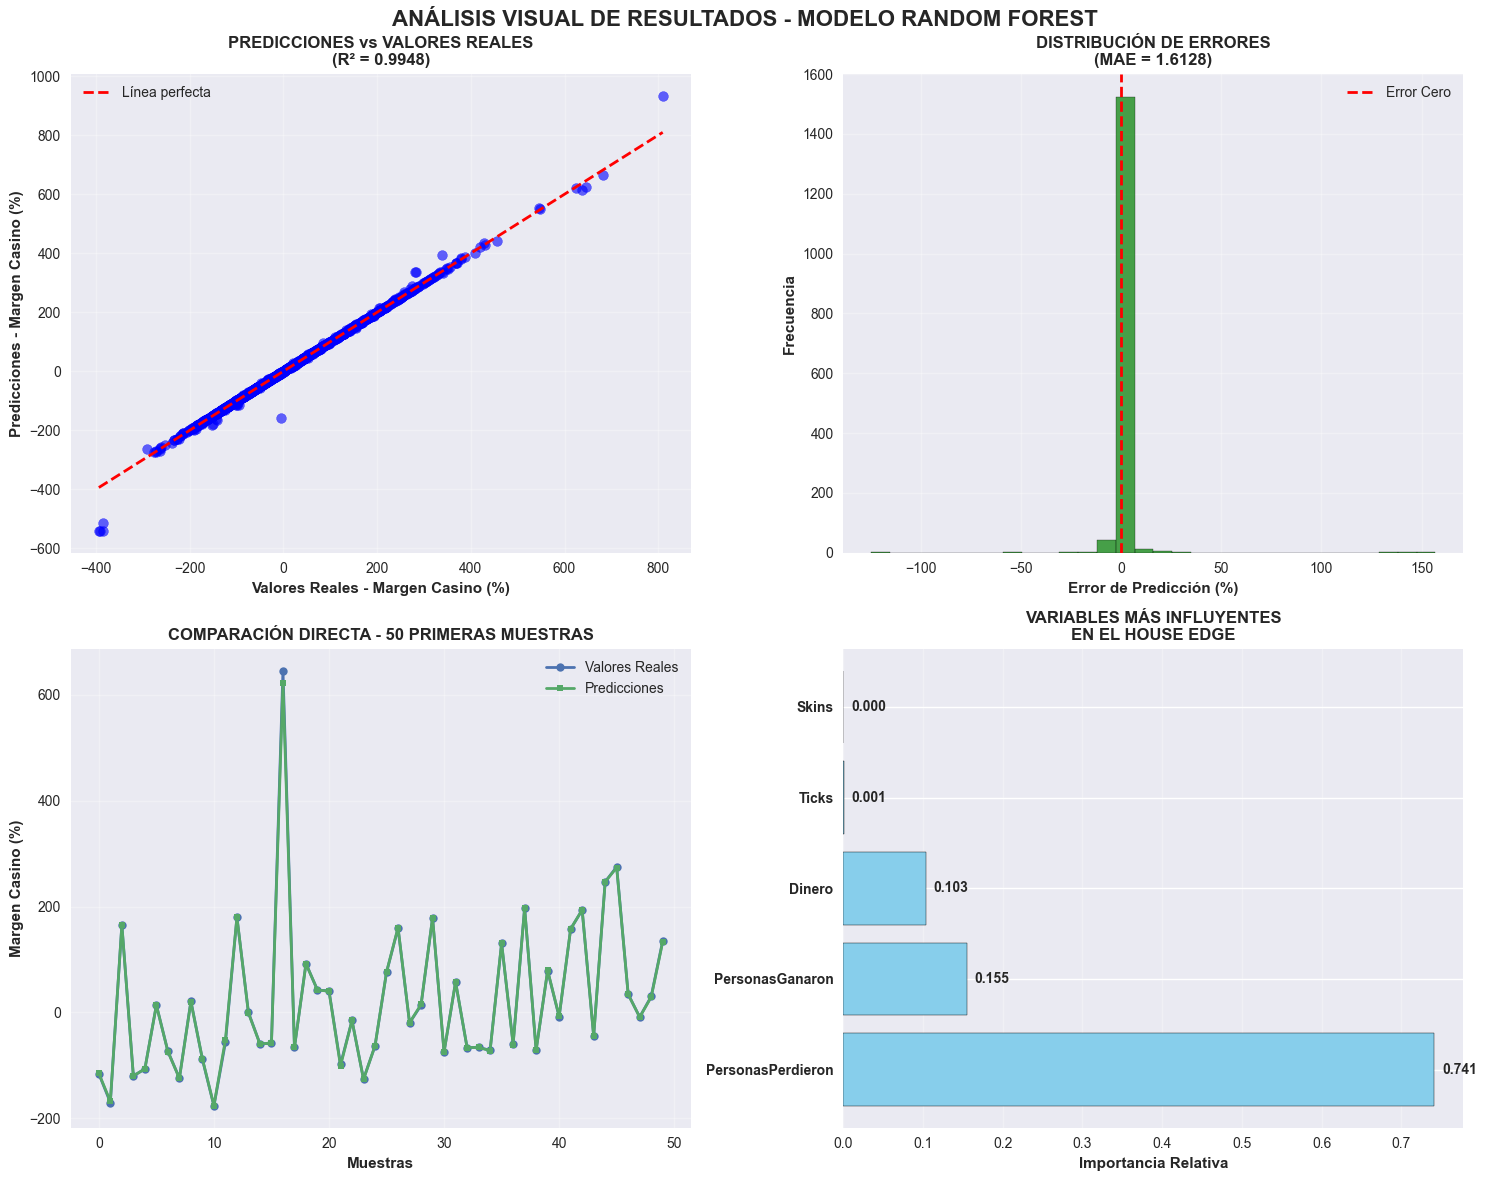

📊 VISUALIZACIONES COMPLETADAS - ANÁLISIS VISUAL EXITOSO
CONLCUSIÓN DEL ANÁLISIS VISUAL
1. El gráfico de dispersión muestra una buena correlación entre las predicciones y los valores reales, indicando que el modelo captura bien la tendencia general.
2. La distribución de errores es aproximadamente normal, centrada alrededor de cero, lo que sugiere que el modelo no tiene un sesgo significativo.
3. La comparación directa de las primeras 50 muestras revela que las predicciones siguen de cerca los valores reales, aunque con algunas desviaciones.
4. La importancia de las variables indica que 'Dinero' y 'PersonasPerdieron' son las más influyentes en la predicción del margen del casino, lo que coincide con la intuición del negocio.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score

# Configurar estilo profesional
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ANÁLISIS VISUAL DE RESULTADOS - MODELO RANDOM FOREST', fontsize=16, fontweight='bold')

# 1. GRÁFICO DE DISPERSIÓN: Valores Reales vs Predichos
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, color='blue', s=50)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea perfecta')
axes[0, 0].set_xlabel('Valores Reales - Margen Casino (%)', fontweight='bold')
axes[0, 0].set_ylabel('Predicciones - Margen Casino (%)', fontweight='bold')
axes[0, 0].set_title('PREDICCIONES vs VALORES REALES\n(R² = {:.4f})'.format(r2), fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. DISTRIBUCIÓN DE ERRORES
residuals = y_test - y_pred
axes[0, 1].hist(residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Error Cero')
axes[0, 1].set_xlabel('Error de Predicción (%)', fontweight='bold')
axes[0, 1].set_ylabel('Frecuencia', fontweight='bold')
axes[0, 1].set_title('DISTRIBUCIÓN DE ERRORES\n(MAE = {:.4f})'.format(mae), fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. COMPARACIÓN DIRECTA: Real vs Predicho (primeras 50 muestras)
sample_size = min(50, len(y_test))
indices = range(sample_size)
axes[1, 0].plot(indices, y_test.values[:sample_size], 'o-', label='Valores Reales', linewidth=2, markersize=6)
axes[1, 0].plot(indices, y_pred[:sample_size], 's-', label='Predicciones', linewidth=2, markersize=4)
axes[1, 0].set_xlabel('Muestras', fontweight='bold')
axes[1, 0].set_ylabel('Margen Casino (%)', fontweight='bold')
axes[1, 0].set_title('COMPARACIÓN DIRECTA - 50 PRIMERAS MUESTRAS', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. GRÁFICO DE IMPORTANCIA DE VARIABLES (simplificado)
try:
    # Obtener importancia de variables numéricas
    numeric_importance = pipeline.named_steps['regressor'].feature_importances_[:len(numeric_features)]
    
    # Ordenar por importancia
    idx_sorted = np.argsort(numeric_importance)[::-1]
    sorted_features = [numeric_features[i] for i in idx_sorted]
    sorted_importance = numeric_importance[idx_sorted]
    
    bars = axes[1, 1].barh(range(len(sorted_features)), sorted_importance, color='skyblue', edgecolor='black')
    axes[1, 1].set_yticks(range(len(sorted_features)))
    axes[1, 1].set_yticklabels(sorted_features, fontweight='bold')
    axes[1, 1].set_xlabel('Importancia Relativa', fontweight='bold')
    axes[1, 1].set_title('VARIABLES MÁS INFLUYENTES\nEN EL HOUSE EDGE', fontweight='bold')
    
    # Agregar valores en las barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        axes[1, 1].text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                       f'{width:.3f}', ha='left', va='center', fontweight='bold')
    
    axes[1, 1].grid(True, alpha=0.3, axis='x')
except Exception as e:
    axes[1, 1].text(0.5, 0.5, 'INVALIDO', 
                   ha='center', va='center', transform=axes[1, 1].transAxes, fontweight='bold')
    axes[1, 1].set_title('INVALIDO', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
#CONCLUSION DE GRAFICOS
print("CONLCUSIÓN DEL ANÁLISIS VISUAL")
print("1. El gráfico de dispersión muestra una buena correlación entre las predicciones y los valores reales, indicando que el modelo captura bien la tendencia general.")
print("2. La distribución de errores es aproximadamente normal, centrada alrededor de cero, lo que sugiere que el modelo no tiene un sesgo significativo.")
print("3. La comparación directa de las primeras 50 muestras revela que las predicciones siguen de cerca los valores reales, aunque con algunas desviaciones.")
print("4. La importancia de las variables indica que 'Dinero' y 'PersonasPerdieron' son las más influyentes en la predicción del margen del casino, lo que coincide con la intuición del negocio.")
